In [1]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn 
#setting the random state 
np.random.seed(42)
#importing clean dataset
df=pd.read_csv("Train_Clean.csv")
print("Shape of the data is : ",df.shape)
print("\n\nThe Data looks like ---------------------->\n\n")
display(df)

Shape of the data is :  (7800, 11)


The Data looks like ---------------------->




,anger,disgust,fear,sadness,surprise,happiness,neutral,Sentences,word_count,char_count,word_density
0,0,0,0,1,1,0,0,محبت پردے میں نفرت کرنےوالو,5,23,0.208333
1,0,0,0,0,0,1,0,حامد میر خوشی اس کا ذمہ دار حکومت خوش,9,29,0.300000
2,0,0,0,0,0,0,1,اس نئے سال شام سپاہی قاتل لارنس شکل میں شعبے ب...,135,526,0.256167
3,0,0,0,0,0,0,1,کچھ اس طرح سے فلم جا سکتے لیکن میں سب سے یقینا...,117,435,0.268349
4,0,0,0,0,0,0,1,رون ہاورڈ اس ایڈیٹرز صرف اتنا کرنا جس کا تھا ا...,84,304,0.275410
...,...,...,...,...,...,...,...,...,...,...,...
7795,0,0,0,0,0,0,1,آپ کس طرح نوجوان برطانوی اداکار اس قابل احترام...,72,275,0.260870
7796,0,0,0,0,0,0,1,میں نے امریکہ کنفیڈریشن امریکہ میں ورجینیا سے ...,106,382,0.276762
7797,0,0,0,0,0,1,0,سورۃ نمبر النساء آیت نمبر جب تم سفر جا تم نماز...,19,65,0.287879
7798,0,0,1,0,0,0,0,رونا نہیں حالات خراب اوراس بیماری نے انہیں مخد...,19,75,0.250000


In [20]:
#reading the test data 
df_test=pd.read_csv("Test_Clean.csv")
print("Shape of the data is : ",df_test.shape)
print("\n\nThe Data looks like ---------------------->\n\n")
display(df_test)

Shape of the data is :  (1950, 8)


The Data looks like ---------------------->




,anger,disgust,fear,sadness,surprise,happiness,neutral,Sentences
0,0,0,0,1,0,0,0,بچھڑنے والوں کا کیسے نہ غم کیا جائے بوجھ ایسا ...
1,0,0,0,0,0,0,1,اس خوفناک اذیت تشدد گندگی میں بدترین ڈی تعاون ...
2,0,0,0,0,0,0,1,تمام ناقص جاز رپ آف افسوس میری وقت پسندیدہ ڈائ...
3,0,0,0,0,0,0,1,اس فلم ساتھ راجر ایوری کوئنتن تارتانتینو سے ہد...
4,0,0,0,0,0,0,1,جنگلی جانوروں غیر ملکی خطوں غیر معمولی ثقافتوں...
...,...,...,...,...,...,...,...,...
1945,0,0,0,0,1,0,0,بڑا حوصلہ نرسری بچے بہت مجھے حیرت سن کر لندن م...
1946,0,0,0,0,0,0,1,اسی فلم تین دیگر ورژن میں نے دیکھا میں نے میرے...
1947,0,0,0,1,0,0,0,یونہی بس بول دیتا طبیعت وگرنہ وہ اداسی کلیجہ م...
1948,0,0,0,1,1,1,0,کبھی خوشیکبھی غم


In [21]:
labels=["anger","disgust","fear","sadness","surprise","happiness","neutral"]
def get_class_weight(data):
    class_weight = {}
    for num,col in enumerate(labels):
        if num not in class_weight:
            class_weight[col] = round((data[data[col] == 1][col].sum())/data.shape[0]*100,2)
    return class_weight
class_weight = get_class_weight(df)
print('Total class weight: ', sum(class_weight.values()), '%\n\n', class_weight)

Total class weight:  127.97 %

 {'anger': 10.4, 'disgust': 9.76, 'fear': 7.81, 'sadness': 28.08, 'surprise': 19.87, 'happiness': 13.41, 'neutral': 38.64}


In [23]:
#on the test data getting the class weight 
class_weight_test=get_class_weight(df_test)
print('Total class weight: ', sum(class_weight_test.values()), '%\n\n', class_weight_test)

Total class weight:  127.94 %

 {'anger': 10.41, 'disgust': 9.74, 'fear': 7.79, 'sadness': 28.1, 'surprise': 19.9, 'happiness': 13.38, 'neutral': 38.62}


In [26]:
from sklearn.model_selection import train_test_split
X_train = df['Sentences'].values
X_test=df_test["Sentences"].values
y_train = df[list(df.columns[0:7])].values
y_test=df_test[list(df_test.columns[0:7])].values
# X, X_test, y, y_test = train_test_split(X_data, y_data, test_size=0.2, train_size=0.8)
# X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25,train_size =0.75)
print(
        'X_train shape', X_train.shape,
        '\ny_train shape', y_train.shape,
        '\nX_test shape', X_test.shape,
        '\ny_test shape', y_test.shape,
    )

# X_train, X_test, y_train,y_test

X_train shape (7800,) 
y_train shape (7800, 7) 
X_test shape (1950,) 
y_test shape (1950, 7)


In [27]:
X_train[0]


'محبت پردے میں نفرت کرنےوالو '

## Bag Of Words

In [28]:
from scipy import sparse as sp_sparse
# Dictionary of all words from train corpus with their counts.
words_counts = {}
for comments in X_train:
    for word in comments.split():
        if word not in words_counts:
            words_counts[word] = 1
        words_counts[word] += 1
        
DICT_SIZE = 10000
POPULAR_WORDS = sorted(words_counts, key=words_counts.get, reverse=True)[:DICT_SIZE]
WORDS_TO_INDEX = {key: rank for rank, key in enumerate(POPULAR_WORDS, 0)}
INDEX_TO_WORDS = {index:word for word, index in WORDS_TO_INDEX.items()}
ALL_WORDS = WORDS_TO_INDEX.keys()

In [29]:
def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    for word in text.split(' '):
        if word in words_to_index:
            result_vector[words_to_index[word]] +=1
    return result_vector

X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape, '\nX_val shape ', X_test_mybag.shape)

X_train shape  (7800, 10000) 
X_val shape  (1950, 10000)


In [30]:
POPULAR_WORDS[:10]

['میں', 'سے', 'اس', 'نہیں', 'کو', 'فلم', 'نے', 'تھا', 'کیا', 'وہ']

## TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
def tfidf_features(X_train, X_test):
    """
        X_train, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5)#, token_pattern='(\S+)')
    # Fit the vectorizer on the train set
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    # Transform the train, test set and return the result
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
    return X_train_tfidf,  X_test_tfidf, tfidf_vectorizer.vocabulary_

X_train_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [33]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

def train_classifier(X_train, y_train, C, regularisation):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.

    model = OneVsRestClassifier(LogisticRegression(penalty=regularisation, C=C, max_iter=20000)).fit(X_train, y_train)
    return model

classifier_mybag = train_classifier(X_train_mybag, y_train, C = 4, regularisation = 'l2')
classifier_tfidf = train_classifier(X_train_tfidf, y_train, C = 4, regularisation = 'l2')

y_test_predicted_labels_mybag = classifier_mybag.predict(X_test_mybag)
y_test_predicted_labels_tfidf = classifier_tfidf.predict(X_test_tfidf)

In [35]:
y_test_predicted_scores_mybag = classifier_mybag.decision_function(X_test_mybag)
y_test_predicted_scores_tfidf = classifier_tfidf.decision_function(X_test_tfidf)

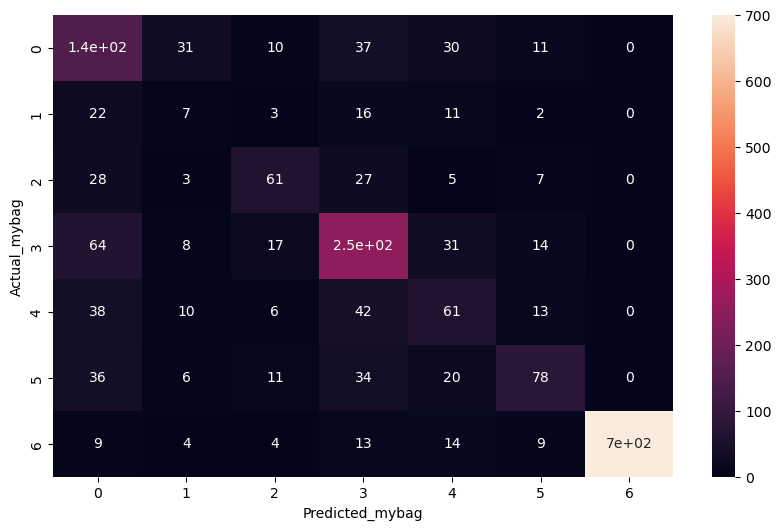

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(
    y_test.argmax(axis=1), y_test_predicted_labels_mybag.argmax(axis=1))

import seaborn as sns
plt.subplots(figsize=(10,6))
sns.heatmap(confusion_mat, annot=True)
plt.xlabel('Predicted_mybag')
plt.ylabel('Actual_mybag')
plt.savefig("Confussion_matrix_BOW.jpeg",bbox_inches="tight")

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import hamming_loss

In [38]:
classifier_mybag = train_classifier(X_train_mybag, y_train, C = 50, regularisation = 'l2')
classifier_tfidf = train_classifier(X_train_tfidf, y_train, C = 50, regularisation = 'l2')

y_test_predicted_labels_mybag = classifier_mybag.predict(X_test_mybag)
y_test_predicted_labels_tfidf = classifier_tfidf.predict(X_test_tfidf)

def print_evaluation_scores(y_test, predicted):
    
    print('Accuracy: ', accuracy_score(y_test, predicted))
    print('F1-score macro: ', f1_score(y_test, predicted, average='macro'))
    print('F1-score micro: ', f1_score(y_test, predicted, average='micro'))
    print('F1-score weighted: ', f1_score(y_test, predicted, average='weighted'))
    print('Precision macro: ', average_precision_score(y_test, predicted, average='macro'))
    print('Precision micro: ', average_precision_score(y_test, predicted, average='micro'))
    print('Precision weighted: ', average_precision_score(y_test, predicted, average='weighted'))
    print("Hamming Loss: ",hamming_loss(y_test,predicted))
    
print('Bag-of-words\n')
print_evaluation_scores(y_test, y_test_predicted_labels_mybag)
print('\nTfidf\n')
print_evaluation_scores(y_test, y_test_predicted_labels_tfidf)

Bag-of-words

Accuracy:  0.5446153846153846
F1-score macro:  0.6027463372834724
F1-score micro:  0.6956521739130435
F1-score weighted:  0.6943617823607217
Precision macro:  0.44891537287737826
Precision micro:  0.5401319134523838
Precision weighted:  0.5775560788464402
Hamming Loss:  0.11076923076923077

Tfidf

Accuracy:  0.5887179487179487
F1-score macro:  0.6258535356106146
F1-score micro:  0.722353446424737
F1-score weighted:  0.7111782333650571
Precision macro:  0.48249950547037695
Precision micro:  0.5840365888988945
Precision weighted:  0.6025201157805969
Hamming Loss:  0.09472527472527473


In [39]:
test_predictions = classifier_tfidf.predict(X_test_tfidf)

In [40]:
def get_pred_labels(data, predictions):
    y_cols = list(data.columns[2:])
    y_label_dict={}
    for k,v in enumerate(y_cols):
        y_label_dict[k] = v

    test_predictions_labels = []
    for pred in predictions:
        label_pred = []
        for index, label in enumerate(list(pred)):
            if label != 0:
                label = y_label_dict[index]
            label_pred.append(label)
        test_predictions_labels.append(tuple([i for i in label_pred if i != 0]))
    return test_predictions_labels

test_pred_labels = get_pred_labels(df, test_predictions)
test_labels = get_pred_labels(df, y_test)

In [41]:
for i in range(90,97):
    print('\ny_label: ', test_labels[i], '\ny_pred: ', test_pred_labels[i])


y_label:  ('word_count',) 
y_pred:  ('word_count',)

y_label:  ('word_count',) 
y_pred:  ('word_count',)

y_label:  () 
y_pred:  ()

y_label:  ('word_count',) 
y_pred:  ('word_count',)

y_label:  ('happiness',) 
y_pred:  ('happiness', 'neutral')

y_label:  ('sadness', 'happiness') 
y_pred:  ('fear', 'sadness', 'surprise')

y_label:  ('sadness', 'neutral') 
y_pred:  ('fear', 'sadness', 'happiness', 'neutral')
